### Aufgabe

Der Datensatz in der Datei `classification.csv` enthält ein einfaches Klassifikationsbeispiel, bei dem anhand von Alter und Interesse an einem Produkt der Verkaufserfolg klassifiziert werden soll. Untersuchen Sie die Fragestellung mit folgenden Klassifikationsmodellen:

- Logistische Regression
- K-Nearest Neighbor
- Perzeptron
- Multilayer-Perzeptron

In der Datei `helper.py` ist wird die Hilfsfunktion `plot_classifier()` zur Verfügung gestellt. Nutzen Sie diese, um sich die Klassengrenzen anzuschauen. Wodurch ergeben sich die Klassengrenzen? Beschreiben Sie das Vorgehen in der Funktion `plot_classifier()`! Was erreichen sie mit dem Paramter `proba`?

Der Aufruf sieht wie folgt aus:

    from helper import plot_classifier
    plot_classifier(model, X, y, proba = False, xlabel = "Alter", ylabel = "Interesse")
    
- `model` .. das trainierte Modell
- `X` .. Eingangsdaten
- `y` .. Ausgangsdaten
- `proba`.. kann `True` oder `False` gesetzt werden.
- `xlabel` .. Laber der x-Achse
- `ylabel` .. Laber der y-Achse



In [2]:
# wird nur benötigt, wenn helper.py nicht im aktuellen Verzeichnis abgelegt werden soll
import sys
sys.path.append('../helperScripts/') 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("DataSets/classification.csv")

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [12]:
from warnings import simplefilter
simplefilter(action='ignore')
from helper import plot_classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=df[["age","interest"]].values
Y=df[["success"]].values

X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25)

model=LogisticRegression();
model.fit(X_train,Y_train)

print("Trainingsdaten: ", model.score(X_train,Y_train))
print("Testdaten: ", model.score(X_test,Y_test))

print(model.coef_)
print(model.intercept_)

Trainingsdaten:  0.8783783783783784
Testdaten:  0.8133333333333334
[[-0.01083846  0.10918465]]
[-4.10068601]


In [47]:
#Application phase
y_predicted = model.predict (X_test)

#plt.plot(X_test[Y_test==0,0],X_test[Y_test==0,1],'rx')
#plt.plot(X_test[Y_test==1,0],X_test[Y_test==1,1],'bx')
#plt.plot(X_test[y_predicted==0,0],X_test[y_predicted==0,1],'r+')
#plt.plot(X_test[y_predicted==1,0],X_test[y_predicted==1,1],'b+')

#plt.show()
print("Predicted", y_predicted)

Predicted [0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0.]


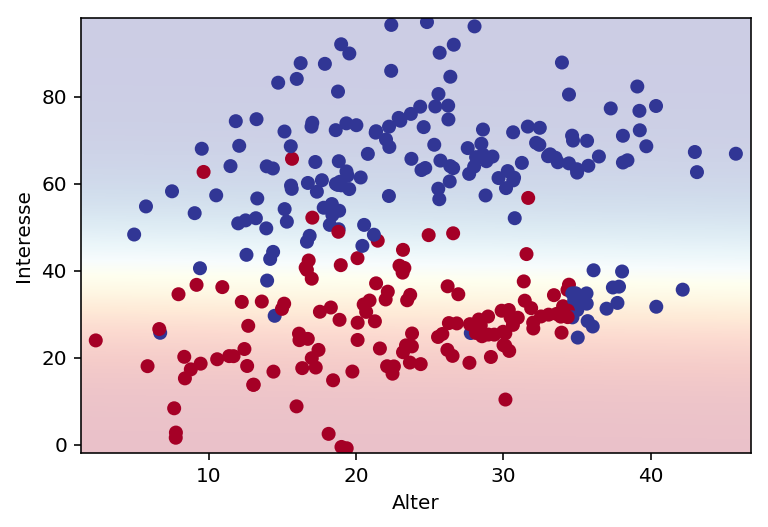

In [48]:
from helper import plot_classifier
#X=df[["age"]].values
#Y=df[["interest"]].values
plot_classifier(model, X, Y[:,0], proba = True, xlabel = "Alter", ylabel = "Interesse")

In [68]:
#K-Nearest-Neighbor
#Training
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 15, 
                             weights = 'uniform',
                            metric='minkowski', p=2)
model.fit(X_train,Y_train)

print(model.score(X_test,Y_test))
      

0.9066666666666666


/home/alice/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


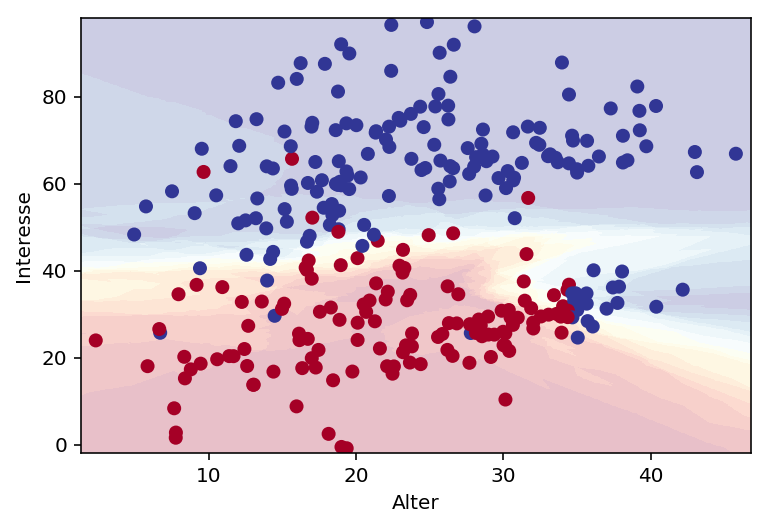

In [69]:
predicted = model.predict(X_test)
predicted_proba = model.predict_proba(X_test)
plot_classifier(model, X, Y[:,0], proba = True, xlabel = "Alter", ylabel = "Interesse")

In [51]:
#Perzeptron
from sklearn.linear_model import Perceptron

model = Perceptron();
model.fit(X_train,Y_train)

print("Trainingsdaten: ", model.score(X_train,Y_train))
print("Testdaten: ", model.score(X_test,Y_test))

print(model.coef_)
print(model.intercept_)

Trainingsdaten:  0.4954954954954955
Testdaten:  0.5466666666666666
[[-120.06542161   30.92470288]]
[-105.]


/home/alice/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


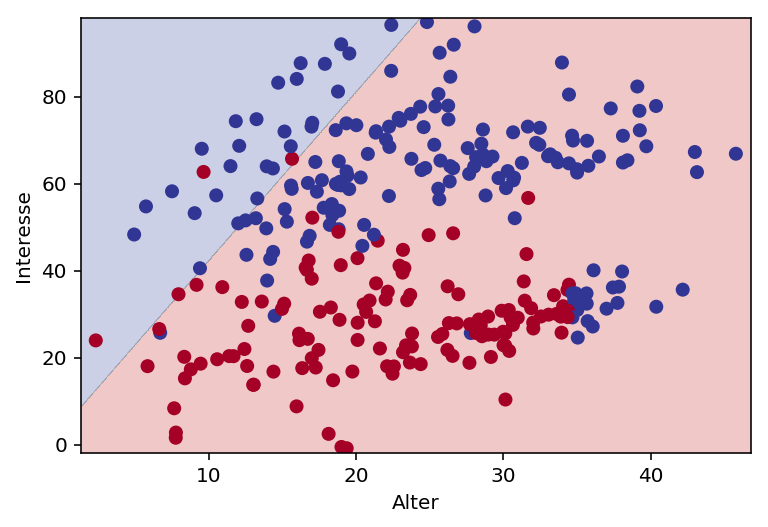

In [53]:
plot_classifier(model, X, Y[:,0], proba = False, xlabel = "Alter", ylabel = "Interesse")

In [8]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, Y_train)  
print("Trainingsdaten: ",mlp.score(X_train,Y_train))
print("Testdaten: ",mlp.score(X_test,Y_test))

/home/alice/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainingsdaten:  0.9099099099099099
Testdaten:  0.8933333333333333


In [11]:
import numpy as np
from sklearn.model_selection import cross_val_score
import itertools
from sklearn.model_selection import KFold
y=df[["success"]].values.ravel()
parameterList = ["age","interest"]
for L in range(1, len(parameterList)+1):
    for subset in itertools.combinations(parameterList, L):
        print(subset)
        x = df[list(subset)].values
        scores = cross_val_score(MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  ,x,y,cv=KFold(n_splits=10, shuffle =True))

        print(np.mean(scores))

('age',)
0.5519540229885058
('interest',)
0.8354022988505747
('age', 'interest')
0.8796551724137931
